In [50]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as sns
import time

import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

% pylab inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

Populating the interactive namespace from numpy and matplotlib


In [2]:
lhr_fname = './Data/Analysis/London_Road_Accident_Features.csv'

lhr_df = pd.read_csv(lhr_fname)
lhr_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,road_lengt,road_count,len_dens,...,sumjunc_co,buff_dens,transit_am,trans_dens,tree_cnt,tree_dens,bkjnc_amt,bkjnc_dens,acc_amt,acc_dens
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,38484.490745,463.0,50.9612,...,674.0,0.8925,47,0.0622,91,0.1205,18,0.0238,23,0.0305
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,31196.917857,331.0,120.2360,...,597.0,2.3009,21,0.0809,53,0.2043,20,0.0771,21,0.0809
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,19631.396026,208.0,135.0258,...,262.0,1.8020,24,0.1651,0,0.0000,5,0.0344,9,0.0619
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,29485.084687,300.0,109.8116,...,462.0,1.7206,38,0.1415,74,0.2756,18,0.0670,9,0.0335
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,20609.220105,226.0,109.7280,...,293.0,1.5600,28,0.1491,0,0.0000,12,0.0639,14,0.0745


In [3]:
lhr_df.columns

Index([u'NAME', u'GSS_CODE', u'HECTARES', u'NONLD_AREA', u'LB_GSS_CD',
       u'BOROUGH', u'POLY_ID', u'road_lengt', u'road_count', u'len_dens',
       u'road_dens', u'traffic_am', u'traf_dens', u'junc_amt', u'junc_dens',
       u'sumjunc_co', u'buff_dens', u'transit_am', u'trans_dens', u'tree_cnt',
       u'tree_dens', u'bkjnc_amt', u'bkjnc_dens', u'acc_amt', u'acc_dens'],
      dtype='object')

In [18]:
# setting the Wards and GSS Codes aside for later incorporation in to the 
Ward = lhr_df.iloc[:,0].as_matrix()
GSS = lhr_df.iloc[:,1].as_matrix()

In [5]:
lhr_dens_df = lhr_df[['NAME', 'GSS_CODE', 'HECTARES', 'BOROUGH', 'len_dens', 'road_dens', 'traf_dens', 
                      'junc_dens', 'buff_dens', 'trans_dens', 'tree_dens', 'bkjnc_dens', 'acc_dens']]
lhr_dens_df.head()

,NAME,GSS_CODE,HECTARES,BOROUGH,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens,acc_dens
0,Chessington South,E05000405,755.173,Kingston upon Thames,50.9612,0.6131,57.0306,0.3244,0.8925,0.0622,0.1205,0.0238,0.0305
1,Tolworth and Hook Rise,E05000414,259.464,Kingston upon Thames,120.2360,1.2757,869.9357,0.6552,2.3009,0.0809,0.2043,0.0771,0.0809
2,Berrylands,E05000401,145.390,Kingston upon Thames,135.0258,1.4306,11.1287,0.7291,1.8020,0.1651,0.0000,0.0344,0.0619
3,Alexandra,E05000400,268.506,Kingston upon Thames,109.8116,1.1173,661.5308,0.6145,1.7206,0.1415,0.2756,0.0670,0.0335
4,Beverley,E05000402,187.821,Kingston upon Thames,109.7280,1.2033,0.0000,0.5750,1.5600,0.1491,0.0000,0.0639,0.0745


In [7]:
# converts string values to index values for use in the anlaysis
label_encoder = preprocessing.LabelEncoder()
lhr_dens_df['NAME'] = label_encoder.fit_transform(lhr_dens_df['NAME'])
lhr_dens_df['GSS_CODE'] = label_encoder.fit_transform(lhr_dens_df['GSS_CODE'])
lhr_dens_df['BOROUGH'] = label_encoder.fit_transform(lhr_dens_df['BOROUGH'])

/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [12]:
dens_df_x = lhr_dens_df.iloc[:,4:-1]
dens_df_y = lhr_dens_df.iloc[:,-1]

In [13]:
dens_df_x.head()

,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens
0,50.9612,0.6131,57.0306,0.3244,0.8925,0.0622,0.1205,0.0238
1,120.2360,1.2757,869.9357,0.6552,2.3009,0.0809,0.2043,0.0771
2,135.0258,1.4306,11.1287,0.7291,1.8020,0.1651,0.0000,0.0344
3,109.8116,1.1173,661.5308,0.6145,1.7206,0.1415,0.2756,0.0670
4,109.7280,1.2033,0.0000,0.5750,1.5600,0.1491,0.0000,0.0639


In [27]:
lhr_dens_df.describe()

,NAME,GSS_CODE,HECTARES,BOROUGH,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens,acc_dens
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,312.596302,324.000000,245.716245,15.736518,143.648671,1.933552,508.665836,0.970270,3.124973,0.237082,5.870297,0.060543,0.264463
std,182.004224,187.494444,257.446441,9.589245,43.189981,0.981668,896.709484,0.445783,2.449996,0.274835,6.072708,0.056201,0.272005
min,0.000000,0.000000,4.346000,0.000000,25.744800,0.132200,0.000000,0.062700,0.125700,0.017100,0.000000,0.000000,0.000000
25%,156.000000,162.000000,113.874000,7.000000,118.250800,1.359500,87.980200,0.699100,1.806900,0.128300,0.828700,0.025300,0.089500
50%,312.000000,324.000000,180.899000,16.000000,144.688900,1.763800,247.218700,0.901000,2.602100,0.185900,4.382800,0.048100,0.183400
75%,470.000000,486.000000,280.147000,24.000000,169.842500,2.310700,571.211700,1.173100,3.728700,0.247200,8.483700,0.079000,0.336800
max,626.000000,648.000000,2903.960000,32.000000,316.695200,10.814500,10722.733500,4.832000,31.523200,3.215900,44.985500,0.506700,3.221400


In [28]:
dens_df_x.describe()

,len_dens,road_dens,traf_dens,junc_dens,buff_dens,trans_dens,tree_dens,bkjnc_dens
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,143.648671,1.933552,508.665836,0.970270,3.124973,0.237082,5.870297,0.060543
std,43.189981,0.981668,896.709484,0.445783,2.449996,0.274835,6.072708,0.056201
min,25.744800,0.132200,0.000000,0.062700,0.125700,0.017100,0.000000,0.000000
25%,118.250800,1.359500,87.980200,0.699100,1.806900,0.128300,0.828700,0.025300
50%,144.688900,1.763800,247.218700,0.901000,2.602100,0.185900,4.382800,0.048100
75%,169.842500,2.310700,571.211700,1.173100,3.728700,0.247200,8.483700,0.079000
max,316.695200,10.814500,10722.733500,4.832000,31.523200,3.215900,44.985500,0.506700


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c31dd9910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c3256b5d0>]], dtype=object)

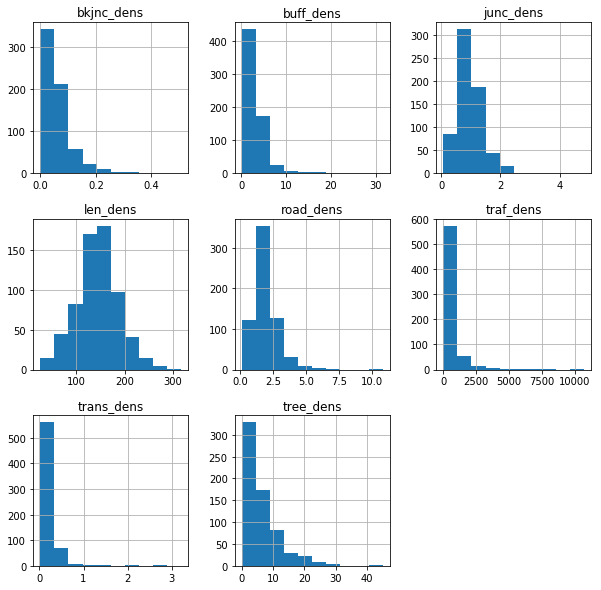

In [32]:
dens_df_x.hist(figsize=(10,10))

In [29]:
dens_df_y.describe()

count    649.000000
mean       0.264463
std        0.272005
min        0.000000
25%        0.089500
50%        0.183400
75%        0.336800
max        3.221400
Name: acc_dens, dtype: float64

/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2d7aea90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c3011a150>]], dtype=object)

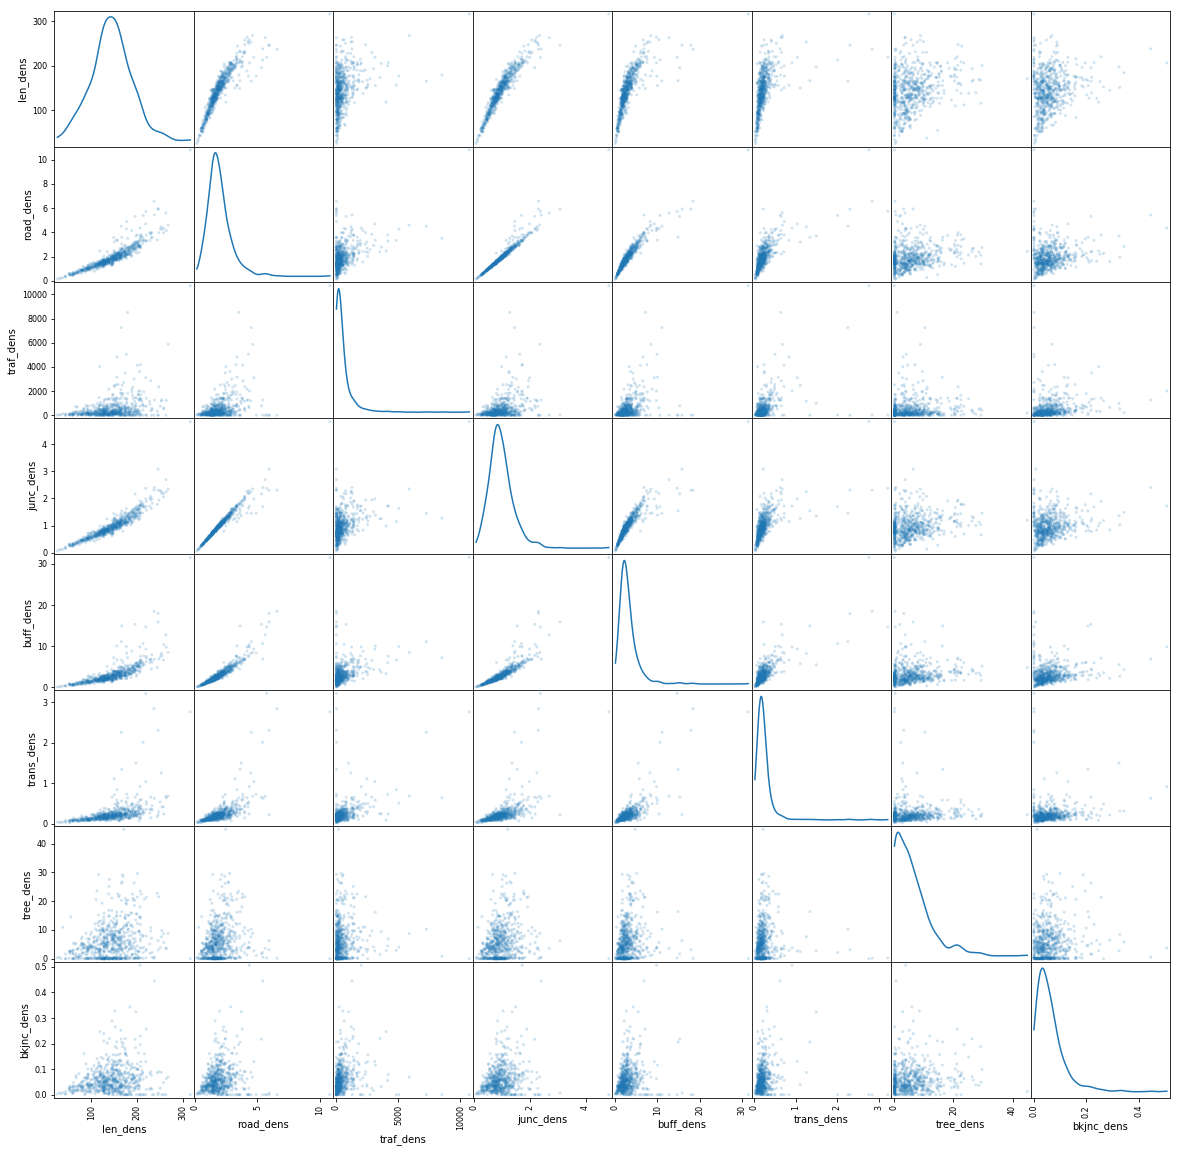

In [14]:
scatter_matrix(dens_df_x, alpha=0.2, figsize=(20,20), diagonal='kde')

In [16]:
model = sm.OLS(dens_df_y, dens_df_x).fit()
predictions = model.predict(dens_df_x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               acc_dens   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     326.8
Date:                Sun, 29 Apr 2018   Prob (F-statistic):          1.81e-220
Time:                        19:37:47   Log-Likelihood:                 235.75
No. Observations:                 649   AIC:                            -455.5
Df Residuals:                     641   BIC:                            -419.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
len_dens      -0.0009      0.000     -2.829      0.005      -0.002      -0.000
road_dens     -0.0324      0.048     -0.679      0.497      -0.126       0.061
traf_dens   8.467e-05   8.82e-06      9.604      0.000    6.74e-05       0.000
junc_dens      0.3155      0.090      3.525      0.000       0.140       0.491
buff_dens      0.0161      0.010      1.630      0.104      -0.003       0.035
trans_dens     0.1941      0.044      4.375      0.000       0.107       0.281
tree_dens      0.0007      0.001      0.633      0.527      -0.002       0.003
bkjnc_dens     0.3288      0.121      2.716      0.007       0.091       0.566
==============================================================================
Omnibus:                      126.138   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2022.951
Skew:                           0.326   Prob(JB):                         0.00
Kurtosis:                      11.625   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = dens_df_x.as_matrix()
Y = dens_df_y.as_matrix()

In [19]:
# --------------------
# Normalizing data
# --------------------
Xtmax = np.amax(X,axis=0)
X = np.divide(X,Xtmax)

In [22]:
# --------------------
# K-fold CV
# --------------------
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)
ts, = Y_test.shape

/Users/tylerrwoh/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [107]:
feat_labels = dens_df_x.columns

# Create a random forest regressor
clr = DecisionTreeRegressor(splitter='best')

# Train the classifier
clr.fit(X_train, Y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clr.feature_importances_):
    print(feature)

('len_dens', 0.10752232802006662)
('road_dens', 0.066289545520970314)
('traf_dens', 0.092195719269142135)
('junc_dens', 0.053825877592796535)
('buff_dens', 0.053142289353190625)
('trans_dens', 0.54942503018405309)
('tree_dens', 0.043754762357626077)
('bkjnc_dens', 0.033844447702154667)


In [106]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(X, y, c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-2.5, 3, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [119]:
# starting clustering with the most significant feature
# based on the random forest regression - road length density

lhr_dens_xy_df = lhr_dens_df[['len_dens','acc_dens']]

X = lhr_dens_xy_df['len_dens'].as_matrix().reshape(-1, 1)
y = lhr_dens_xy_df['acc_dens'].as_matrix().reshape(-1, 1)

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

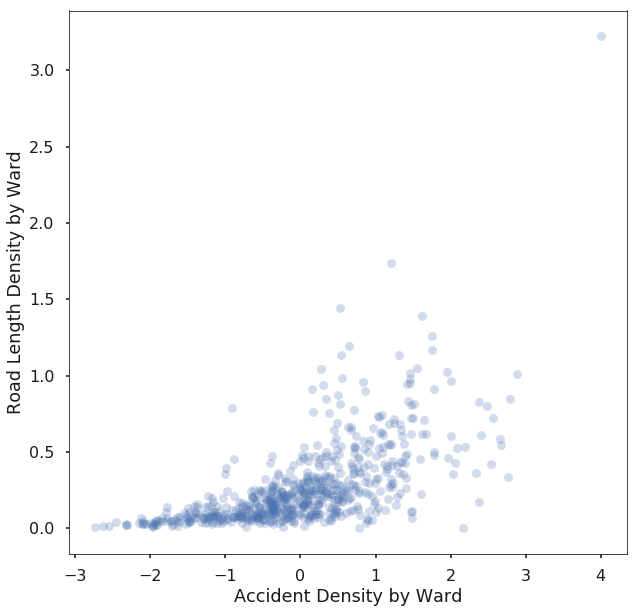

In [120]:
# start with a simple scatter plot
plt.figure(figsize=(10,10))
plt.scatter(X, y, c='b', **plot_kwds)
plt.xlabel("Accident Density by Ward")
plt.ylabel("Road Length Density by Ward")
frame = plt.gca()

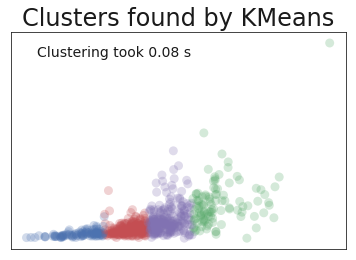

In [86]:
plot_clusters(lhr_dens_xy_df, cluster.KMeans, (), {'n_clusters':4})

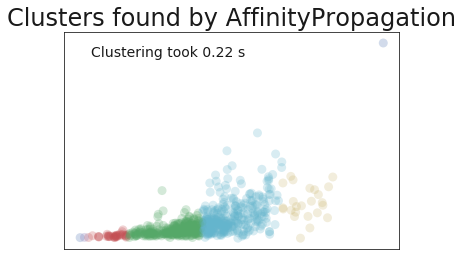

In [88]:
plot_clusters(lhr_dens_xy_df, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

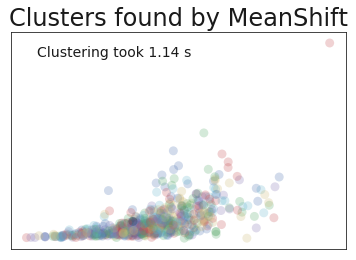

In [89]:
plot_clusters(lhr_dens_xy_df, cluster.MeanShift, (0.175,), {'cluster_all':False})

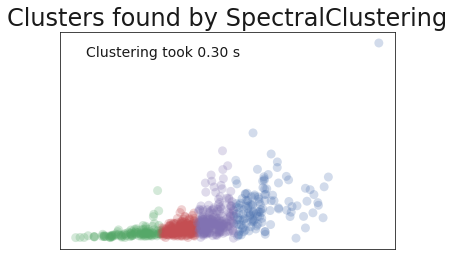

In [94]:
plot_clusters(lhr_dens_xy_df, cluster.SpectralClustering, (), 
              {'n_clusters':4, 'eigen_solver':'arpack', 'affinity':'nearest_neighbors'})

In [121]:
# continuing clustering with another significant feature 
# based on the random forest regression - junction density
lhr_dens_xy_df = lhr_dens_df[['junc_dens','acc_dens']]

X = lhr_dens_xy_df['junc_dens'].as_matrix().reshape(-1, 1)
y = lhr_dens_xy_df['acc_dens'].as_matrix().reshape(-1, 1)

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

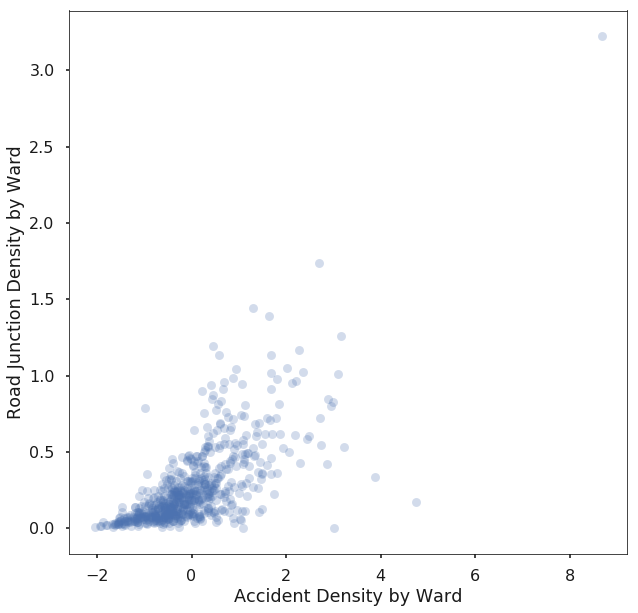

In [122]:
# start with a simple scatter plot of the values

plt.figure(figsize=(10,10))
plt.scatter(X, y, c='b', **plot_kwds)
plt.xlabel("Accident Density by Ward")
plt.ylabel("Road Junction Density by Ward")
frame = plt.gca()

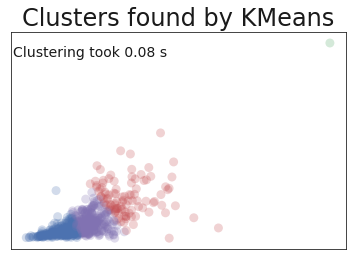

In [123]:
plot_clusters(lhr_dens_xy_df, cluster.KMeans, (), {'n_clusters':4})

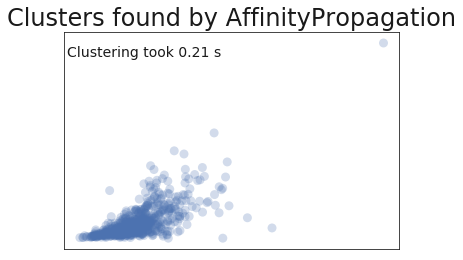

In [124]:
plot_clusters(lhr_dens_xy_df, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

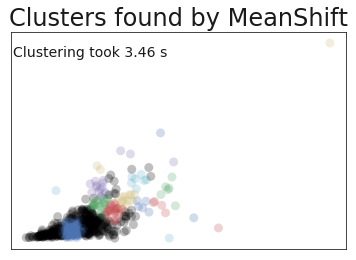

In [125]:
plot_clusters(lhr_dens_xy_df, cluster.MeanShift, (0.175,), {'cluster_all':False})

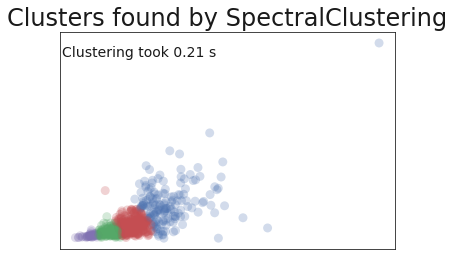

In [126]:
plot_clusters(lhr_dens_xy_df, cluster.SpectralClustering, (), 
              {'n_clusters':4, 'eigen_solver':'arpack', 'affinity':'nearest_neighbors'})